# Finding melt ponds in 6/22 all tracks

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
import h5py  
import os, sys
sys.path.append('../')
import datetime

# read pkl

In [19]:
IS2_path='/Volumes/EllenBackup/DATA/IS2/ATL03_20190622202251_13070304_002_01.h5'
f = h5py.File(IS2_path, 'r')
track_num= 3

In [11]:
orient=f['/orbit_info/sc_orient'][:][0]
if orient==0:
    track='gt'+str(track_num)+'l'
else:
    track='gt'+str(track_num)+'r'
heights=f[track+'/heights/h_ph'][:]
lats=f[track+'/heights/lat_ph'][:]
lons=f[track+'/heights/lon_ph'][:]
conf=f[track+'/heights/signal_conf_ph'][:]
conf_si= [x[2] for x in conf]
dt= f[track+'/heights/delta_time'][:]
#geoid=f['gt1l/geophys_corr/geoid'][:]
d = {'heights': heights, 'lats': lats, 'lons':lons, 'conf':conf_si,'dt':dt}#,'geoid':geoid}
df = pd.DataFrame(data=d)

In [12]:
df.to_pickle(IS2_path[-33:-25]+'_gt'+str(track_num)+'l_'+IS2_path[-18:-14]+'.pkl')

In [20]:
df=pd.read_pickle(IS2_path[-33:-25]+'_gt'+str(track_num)+'l_'+IS2_path[-18:-14]+'.pkl')
df.head()

conf            dt     heights       lats       lons
0    -1  4.647017e+07  596.926819  80.005996  96.586955
1    -1  4.647017e+07  547.650513  80.005999  96.586970
2    -1  4.647017e+07  529.577026  80.006000  96.586975
3    -1  4.647017e+07  478.722992  80.006003  96.586990
4    -1  4.647017e+07  451.830841  80.006005  96.586998

# cut df

In [21]:
df_cut= df[(df['lats']>82.25) &(df['lats']<83.1)&(df['lons']>-61)&(df['lons']<-30)]#&(df['conf']>1)]

In [22]:
print( df_cut['lons'].values[-1],df_cut['lats'].values[-1], df_cut['dt'].values[-1],df_cut['lons'].values[0],df_cut['lats'].values[0],df_cut['dt'].values[0] )

(-58.78322592924784, 82.2500004751223, 46470444.09685222, -56.86095802176879, 83.0999969511849, 46470430.17735192)


In [53]:
df_cut.dt.values[0]

46470430.17735192

In [52]:
df_cut.head()

conf            dt    heights       lats       lons
20157424     0  4.647043e+07  56.603642  83.099997 -56.860958
20157425     0  4.647043e+07  40.484913  83.099996 -56.860967
20157426     0  4.647043e+07  50.729408  83.099991 -56.860977
20157427     0  4.647043e+07  70.911583  83.099991 -56.860965
20157428     0  4.647043e+07  38.964729  83.099990 -56.860984

# map segment

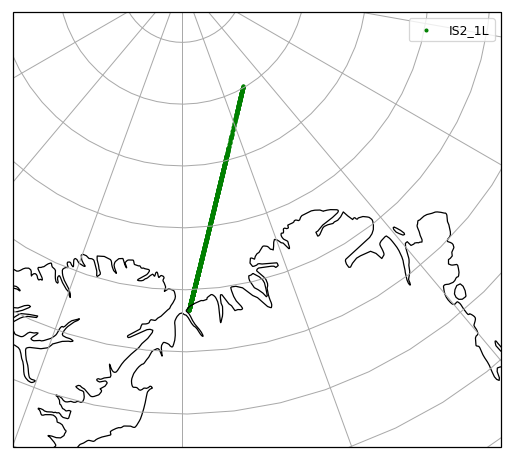

In [63]:
#plt.figure(figsize=(12, 5))

plt.figure(figsize=(7,7), dpi= 90)
# Make a new "NorthPolarStereo" projection instance
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-60))

#plt.scatter(df['lons'][::10000],df['lats'][::10000],c='g', s=5, label='IS2_1L',transform=ccrs.PlateCarree())
plt.scatter(df_cut['lons'][::10000],df_cut['lats'][::10000],c='g', s=5, label='IS2_1L',transform=ccrs.PlateCarree())

#plt.colorbar(label='seconds', shrink=0.5, extend='both')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
#plt.xlim(-125.5,-125)
#plt.ylim(86.4,86.5)
#ax.set_extent([-137, -128, 85, 87.5], ccrs.PlateCarree())
ax.set_extent([-80,-20, 78, 89], ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.gridlines(color='darkgrey')
plt.legend()
plt.show()


# save as txt

In [64]:
np.savetxt('/Volumes/EllenBackup/ANALYSIS/IS2/MP_retrack/0622_'+track+'.txt', df_cut.filter(items=['lons','lats'])[::1000].values, fmt='%.8f',delimiter= '\t')

# plot specific mp

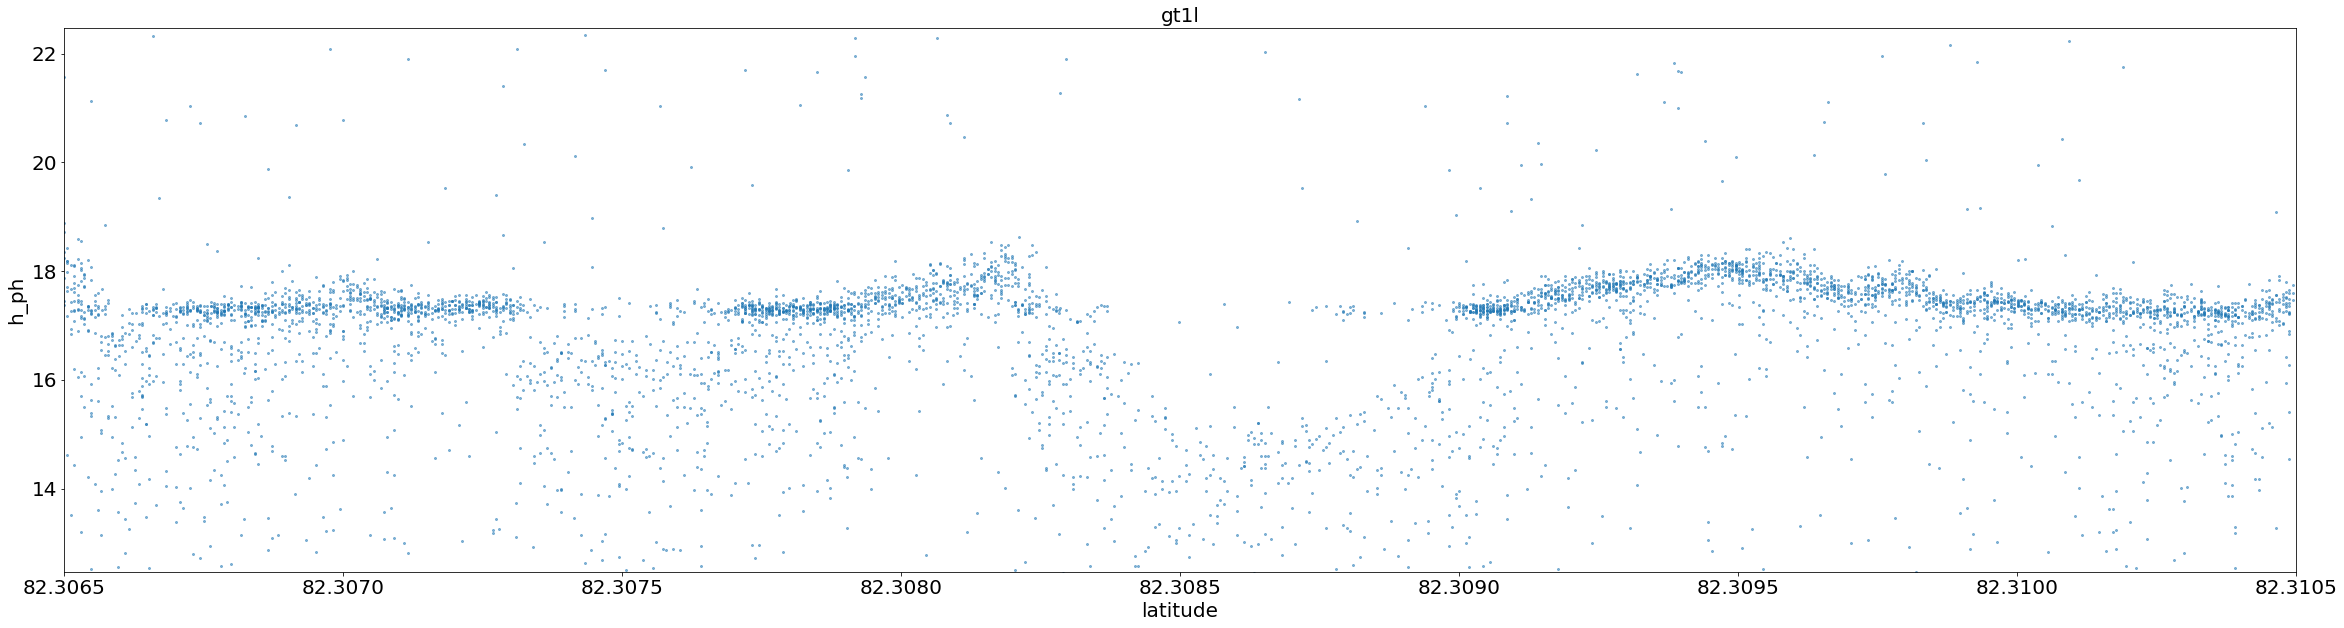

In [13]:
for a in [82.3085]:#[84.621,83.715,82.922,82.854,82.630,82.660,82.612,82.523,82.448,82.404,82.371,82.370,82.308,82.881]:
    minlat=a-.002
    maxlat=a+.002
    fig, ax = plt.subplots(1,1,figsize=(40,10));
    y= df_cut[(df_cut.lats>(minlat))&(df_cut.lats<(maxlat))]

    ax.scatter(y['lats'],y['heights'],alpha=.5,s=4);
    #ax.scatter([round(x-y['dt'].values[0]*7000,2)for x in y['dt']*7000],y['heights'],alpha=.5,s=4);
    ax.set_ylim(15,20)
    #ax[i].secondary_xaxis(df_cut['lons'][beg:en])
    ax.ticklabel_format(useOffset=False)
    ax.set_ylim(np.mean(y['heights'])-5,np.mean(y['heights'])+5)
    ax.set_xlim(min(y['lats']),max(y['lats']))
    plt.title(track, fontsize=20)
    plt.xlabel('latitude', fontsize=20)
    plt.xticks(fontsize=20);
    plt.yticks(fontsize=20);
    plt.ylabel('h_ph', fontsize=20)
    #plt.savefig('rgt1307_0622/'+track+'_'+str(np.mean(y.lats.values).round(3))+'.jpg')


# write mps to text file

In [26]:
print y.iloc[(y['lats']-82.3085).abs().argsort()[:1]].lons.values[0], y.iloc[(y['lats']-82.3085).abs().argsort()[:1]].lats.values[0], y.iloc[(y['lats']-82.3085).abs().argsort()[:1]].dt.values[0]

-58.212401705744725 82.30850031755516 46470442.920452245


In [30]:
i=82.3085
y.iloc[(y['lats']-i).abs().argsort()[:1]].dt.values[0]

46470442.920452245

In [64]:
#gt1l'
track_num=1
df=pd.read_pickle(IS2_path[-33:-25]+'_gt'+str(track_num)+'l_'+IS2_path[-18:-14]+'.pkl')
df= df[(df['lats']>82.25) &(df['lats']<83.1)&(df['lons']>-61)&(df['lons']<-30)]#&(df['conf']>1)]
with open(IS2_path[-33:-25]+'_gt'+str(track_num)+'l_'+IS2_path[-18:-14]+'_MPlocation.txt', 'w') as f:
    for i in [82.3085,82.3698,82.3719,82.5235]:
        f.write(str(df.iloc[(df['lats']-i).abs().argsort()[:1]].lons.values[0])+ "\t" + str(df.iloc[(df['lats']-i).abs().argsort()[:1]].lats.values[0])+ "\t" + str(df.iloc[(df['lats']-i).abs().argsort()[:1]].dt.values[0]) + "\n")

In [65]:
#gt2l
track_num=2
df=pd.read_pickle(IS2_path[-33:-25]+'_gt'+str(track_num)+'l_'+IS2_path[-18:-14]+'.pkl')
df= df[(df['lats']>82.25) &(df['lats']<83.1)&(df['lons']>-61)&(df['lons']<-30)]#&(df['conf']>1)]
with open(IS2_path[-33:-25]+'_gt'+str(track_num)+'l_'+IS2_path[-18:-14]+'_MPlocation.txt', 'w') as f:
    for i in [82.8235]:
       f.write(str(df.iloc[(df['lats']-i).abs().argsort()[:1]].lons.values[0])+ "\t" + str(df.iloc[(df['lats']-i).abs().argsort()[:1]].lats.values[0])+ "\t" + str(df.iloc[(df['lats']-i).abs().argsort()[:1]].dt.values[0]) + "\n")

In [66]:
#gt3l
track_num=3
df=pd.read_pickle(IS2_path[-33:-25]+'_gt'+str(track_num)+'l_'+IS2_path[-18:-14]+'.pkl')
df= df[(df['lats']>82.25) &(df['lats']<83.1)&(df['lons']>-61)&(df['lons']<-30)]#&(df['conf']>1)]
with open(IS2_path[-33:-25]+'_gt'+str(track_num)+'l_'+IS2_path[-18:-14]+'_MPlocation.txt', 'w') as f:
    for i in [82.474001,82.922,83.024,82.3555]:
        f.write(str(df.iloc[(df['lats']-i).abs().argsort()[:1]].lons.values[0])+ "\t" + str(df.iloc[(df['lats']-i).abs().argsort()[:1]].lats.values[0])+ "\t" + str(df.iloc[(df['lats']-i).abs().argsort()[:1]].dt.values[0]) + "\n")

In [62]:
df.iloc[(df['lats']-82.474001).abs().argsort()[:20]]

conf            dt     heights       lats       lons
22128250     1  4.647044e+07    9.830891  82.474001 -58.318888
22128248     0  4.647044e+07    7.715887  82.474001 -58.318889
22128249     1  4.647044e+07   15.758734  82.474001 -58.318885
22128247     0  4.647044e+07   31.050348  82.474002 -58.318877
5758595      1  4.647021e+07    3.622091  82.474000  92.603862
5758591      1  4.647021e+07    4.179599  82.474000  92.603862
5758592      1  4.647021e+07    5.231063  82.474000  92.603862
5758594      4  4.647021e+07    7.040848  82.474000  92.603861
5758590      4  4.647021e+07    7.166757  82.474000  92.603861
5758593      4  4.647021e+07    7.233300  82.474000  92.603861
22128246     0  4.647044e+07   57.250813  82.474002 -58.318863
22128241     0  4.647044e+07  -87.068756  82.474004 -58.318927
22128242     0  4.647044e+07  -76.265106  82.474004 -58.318921
22128240     0  4.647044e+07  -48.991520  82.474005 -58.318906
22128245     0  4.647044e+07  158.922287  82.474006 -58.318809
5758602      4  4.647021e+07    7.157010  82.474006  92.603848
5758600      4  4.647021e+07    7.067715  82.474006  92.603848
5758598      4  4.647021e+07    7.031147  82.474006  92.603848
5758596      4  4.647021e+07    7.023769  82.474006  92.603848
5758597      4  4.647021e+07    6.925087  82.474006  92.603848

# plot whole segment

In [39]:
en

2000000

In [56]:
fig, ax = plt.subplots(100,1,figsize=(40,500));
for i in np.arange(0,100):
    ref=8000000+i*20000
    beg=ref #90000
    en=min(ref+20000,len(df_cut)) #230000
    ax[i].scatter(df_cut['lats'][beg:en],df_cut['heights'][beg:en],alpha=.1,s=4,c='k');
    #ax[i].scatter([round(x-df1L4['dt'].values[ref]*7000,2)for x in df1L4['dt'][beg:en]*7000],df1L4['heights'][beg:en],alpha=.5,s=4);
    #ax[i].scatter([round(x-df1L['dt'].values[ref]*7000,2)for x in df1L['dt'][beg:en]*7000],df1L['heights'][beg:en],alpha=.5,s=4);
    ax[i].set_ylim(np.mean(df_cut['heights'][beg:en])-5,np.mean(df_cut['heights'][beg:en])+5)
    ax[i].tick_params(labelsize=20)
    ax[i].ticklabel_format(useOffset=False)
plt.xlabel('meters', fontsize=20);
plt.ylabel('h_ph', fontsize=20);
#plt.xticks(np.arange(0,df1L['dt'].values[en]*7000-df1L['dt'].values[beg]*7000,100),fontsize=16),plt.yticks(fontsize=16);
plt.ticklabel_format(useOffset=False)
#plt.savefig('rgt1307_0622/'+track+'_segment1.png')

ValueError: Axis limits cannot be NaN or Inf